<a href="https://colab.research.google.com/github/padobrik/2de-processing/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import torchvision
from PIL import Image
import io
from sklearn.preprocessing import normalize

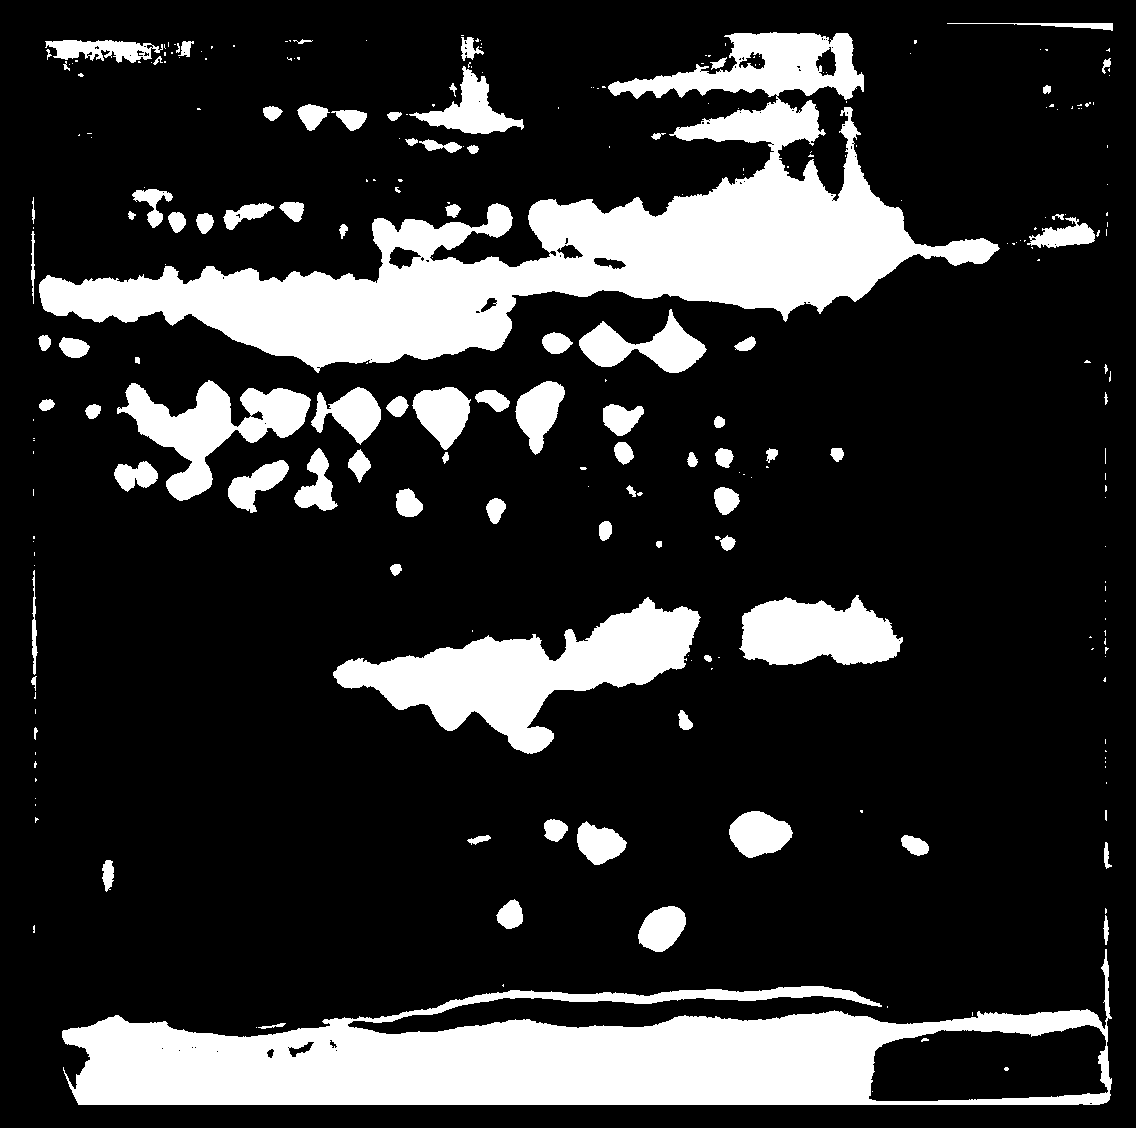

In [51]:
def read_image(path: str) -> np.ndarray:
  image = cv2.imread(path)
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  return grayscale

def clahe(image: np.ndarray, clip_limit: int, grid: tuple) -> np.ndarray:
  CLAHE = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid)
  return CLAHE.apply(image)

def threshold(image: np.ndarray, thresh: int, maxval: int, thresh_type = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) -> np.ndarray:
  _, with_threshold = cv2.threshold(image, thresh, maxval, thresh_type)
  return with_threshold

image = read_image('test.tiff')
with_clahe = clahe(image, 2.5, (6,6))
with_threshold = threshold(with_clahe, 0, 255)

cv2_imshow(with_threshold)